In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [38]:
pip install xgboost


  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 777.7 kB/s eta 0:02:09
   ---------------------------------------- 0.1/99.8 MB 521.8 kB/s eta 0:03:11
   ---------------------------------------- 0.1/99.8 MB 599.1 kB/s eta 0:02:47
   ---------------------------------------- 0.1/99.8 MB 607.9 kB/s eta 0:02:44
   ---------------------------------------- 0.2/99.8 MB 689.9 kB/s eta 0:02:25
   ---------------------------------------- 0.3/99.8 MB 883.3 kB/s eta 0:01:53
   ---------------------------------------- 0.3/99.8 MB 952.6 kB/s eta 0:01:45
   -----------------------

In [55]:
!pip install klib dtale joblib

In [2]:
big_mart_data = pd.read_csv('Train.csv')

In [56]:
df_test=pd.read_csv('Test.csv')

In [3]:
# first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [5]:
# getting some information about thye dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Categorical Features:

#Item_Identifier
#Item_Fat_Content
#Item_Type
#Outlet_Identifier
#Outlet_Size
#Outlet_Location_Type
#Outlet_Type

In [6]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [57]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Handling Missing Values

Mean --> average

Mode --> more repeated value

In [7]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [58]:
# filling the missing values in "Item_weight column" with "Mean" value becuase it is numerical
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

In [59]:
big_mart_data.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [60]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Oulet size is categorical column so fill it with Mode

In [9]:
# mode of "Outlet_Size" column
big_mart_data['Outlet_Size'].mode()


0    Medium
Name: Outlet_Size, dtype: object

In [64]:
big_mart_data['Outlet_Size'].fillna(big_mart_data['Outlet_Size'].mode()[0], inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)

In [65]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [66]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [67]:
big_mart_data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.453596,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.683084,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


Numerical Features

In [68]:
#Selecting Feature based on general requirements

In [69]:
big_mart_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [70]:
big_mart_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [ ]:
#EDA WITH DTALE LIBRARY

In [74]:
import dtale

In [75]:
dtale.show(big_mart_data)

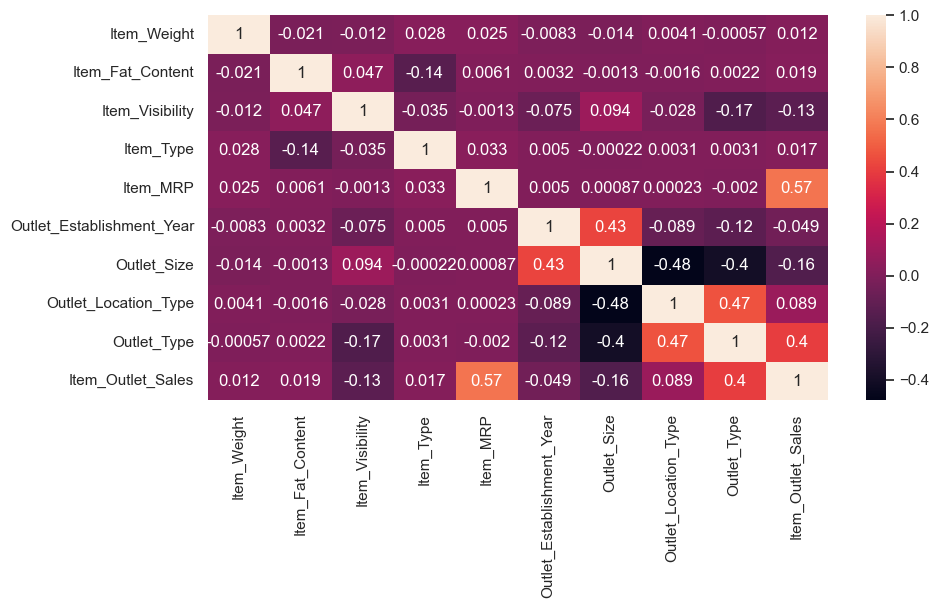

In [81]:
plt.figure(figsize=(10,5))
sns.heatmap(big_mart_data.corr(),annot=True)
plt.show()

In [ ]:
#EDA

In [71]:
import klib

In [73]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(big_mart_data) # returns a visualization of the number and frequency of cate

No columns with categorical data were detected.


In [82]:
klib.corr_mat(big_mart_data) # returns a color-encoded correlation matrix


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\klib\describe.py:271: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.00,-0.02,-0.01,0.03,0.02,-0.01,-0.01,0.00,-0.00,0.01
Item_Fat_Content,-0.02,1.00,0.05,-0.14,0.01,0.00,-0.00,-0.00,0.00,0.02
Item_Visibility,-0.01,0.05,1.00,-0.04,-0.00,-0.07,0.09,-0.03,-0.17,-0.13
Item_Type,0.03,-0.14,-0.04,1.00,0.03,0.00,-0.00,0.00,0.00,0.02
Item_MRP,0.02,0.01,-0.00,0.03,1.00,0.01,0.00,0.00,-0.00,0.57
Outlet_Establishment_Year,-0.01,0.00,-0.07,0.00,0.01,1.00,0.43,-0.09,-0.12,-0.05
Outlet_Size,-0.01,-0.00,0.09,-0.00,0.00,0.43,1.00,-0.48,-0.40,-0.16
Outlet_Location_Type,0.00,-0.00,-0.03,0.00,0.00,-0.09,-0.48,1.00,0.47,0.09
Outlet_Type,-0.00,0.00,-0.17,0.00,-0.00,-0.12,-0.40,0.47,1.00,0.40
Item_Outlet_Sales,0.01,0.02,-0.13,0.02,0.57,-0.05,-0.16,0.09,0.40,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

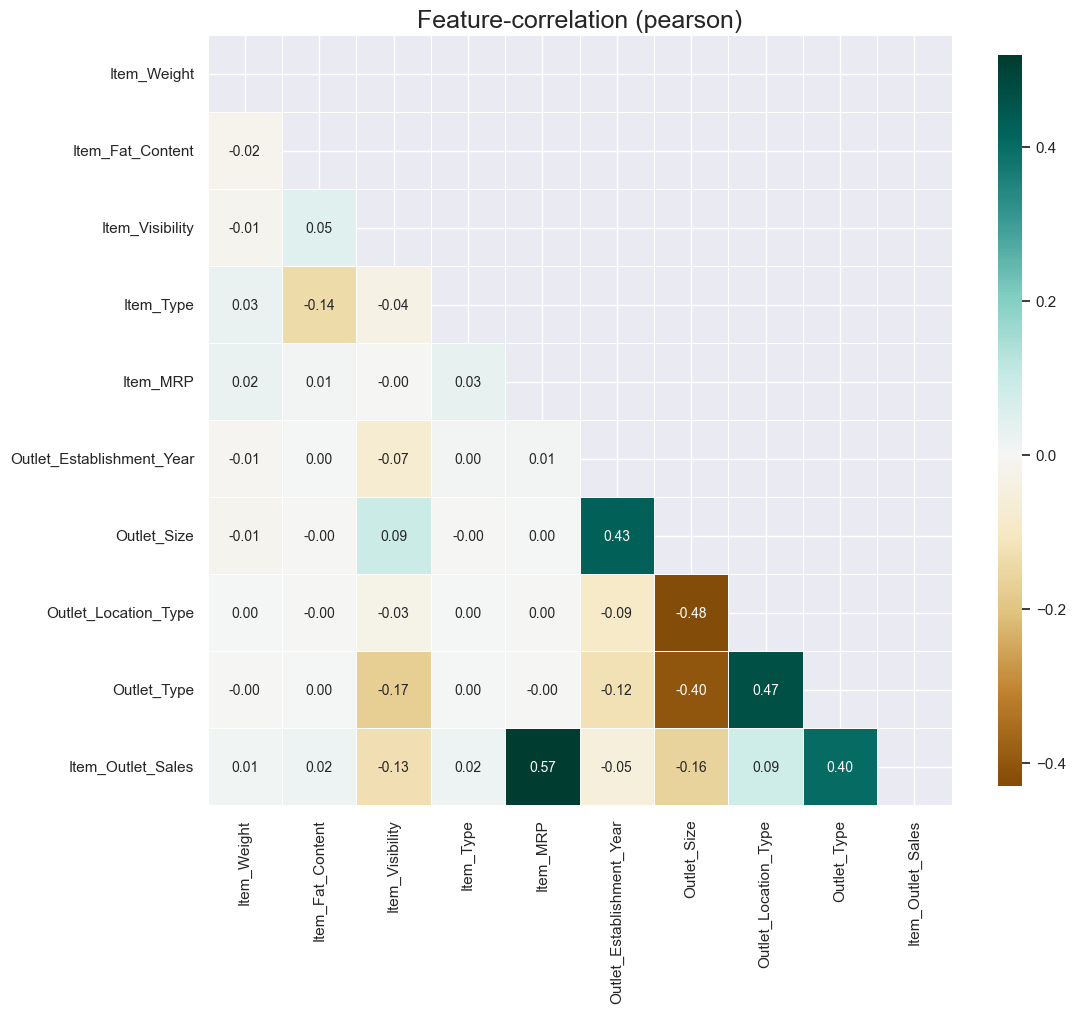

In [85]:
klib.corr_plot(big_mart_data) # returns a color-encoded heatmap, ideal for correlations


<Axes: xlabel='Item_Weight', ylabel='Density'>

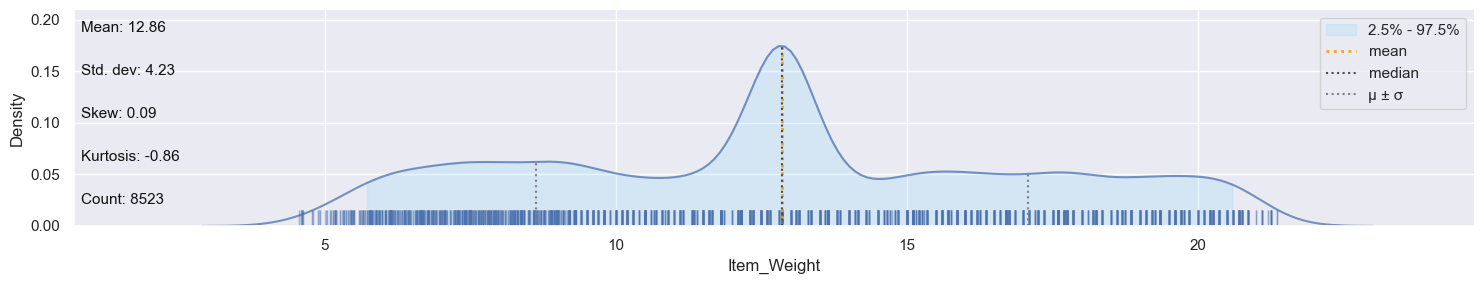

In [86]:
klib.dist_plot(big_mart_data) # returns a distribution plot for every numeric feature


In [87]:
klib.missingval_plot(big_mart_data) # returns a figure containing information about missing values


No missing values found in the dataset.


DATA CLEANING USING KLIB LIBRARY

In [89]:
klib.data_cleaning(big_mart_data) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)


Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.18 MB (-36.73%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,0,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,1,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,0,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,1,0.000000,6,182.095001,1998,2,2,0,732.380005
4,8.930000,0,0.000000,9,53.861401,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0,0.056783,13,214.521805,1987,0,2,1,2778.383301
8519,8.380000,1,0.046982,0,108.156998,2002,2,1,1,549.284973
8520,10.600000,0,0.035186,8,85.122398,2004,2,1,1,1193.113647
8521,7.210000,1,0.145221,13,103.133202,2009,1,2,2,1845.597656


In [90]:
klib.clean_column_names(big_mart_data) # cleans and standardizes column names, also called inside data_cleaning()


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [91]:
big_mart_data=klib.convert_datatypes(big_mart_data) # converts existing to more efficient dtypes, also called inside data_cleaning()
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float32
 1   item_fat_content           8523 non-null   int32  
 2   item_visibility            8523 non-null   float32
 3   item_type                  8523 non-null   int32  
 4   item_mrp                   8523 non-null   float32
 5   outlet_establishment_year  8523 non-null   int16  
 6   outlet_size                8523 non-null   int32  
 7   outlet_location_type       8523 non-null   int32  
 8   outlet_type                8523 non-null   int32  
 9   item_outlet_sales          8523 non-null   float32
dtypes: float32(4), int16(1), int32(5)
memory usage: 316.4 KB


In [93]:
klib.mv_col_handling(big_mart_data)


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\klib\clean.py:436: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,0,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,1,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,0,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,1,0.000000,6,182.095001,1998,2,2,0,732.380005
4,8.930000,0,0.000000,9,53.861401,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0,0.056783,13,214.521805,1987,0,2,1,2778.383301
8519,8.380000,1,0.046982,0,108.156998,2002,2,1,1,549.284973
8520,10.600000,0,0.035186,8,85.122398,2004,2,1,1,1193.113647
8521,7.210000,1,0.145221,13,103.133202,2009,1,2,2,1845.597656


Preprocessing Task before Model Building
1) Label Encoding

In [94]:
le=LabelEncoder()

In [96]:
big_mart_data['item_fat_content']= le.fit_transform(big_mart_data['item_fat_content'])
big_mart_data['item_type']= le.fit_transform(big_mart_data['item_type'])
big_mart_data['outlet_size']= le.fit_transform(big_mart_data['outlet_size'])
big_mart_data['outlet_location_type']= le.fit_transform(big_mart_data['outlet_location_type'])
big_mart_data['outlet_type']= le.fit_transform(big_mart_data['outlet_type'])

In [97]:
big_mart_data

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,0,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,1,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,0,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,1,0.000000,6,182.095001,1998,2,2,0,732.380005
4,8.930000,0,0.000000,9,53.861401,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0,0.056783,13,214.521805,1987,0,2,1,2778.383301
8519,8.380000,1,0.046982,0,108.156998,2002,2,1,1,549.284973
8520,10.600000,0,0.035186,8,85.122398,2004,2,1,1,1193.113647
8521,7.210000,1,0.145221,13,103.133202,2009,1,2,2,1845.597656


SPLIT DATASET INTO TRAIN AND TEST

In [98]:
X=big_mart_data.drop('item_outlet_sales',axis=1)
Y=big_mart_data['item_outlet_sales']


In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)


In [ ]:
3) Standarization

In [100]:
X.describe()


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857646,0.352693,0.066132,7.226681,140.992767,1997.831867,1.453596,1.112871,1.201220
std,4.226124,0.477836,0.051598,4.209990,62.275066,8.371760,0.683084,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290001,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,0.000000,0.053931,6.000000,143.012802,1999.000000,2.000000,1.000000,1.000000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.328391,15.000000,266.888397,2009.000000,2.000000,2.000000,3.000000


In [101]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [102]:
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)


In [103]:
X_train_std


array([[ 1.52290023, -0.74155088,  0.68469731, ..., -2.13209709,
         1.08786619, -0.25964107],
       [-1.239856  , -0.74155088, -0.09514746, ...,  0.80430084,
        -0.13870429, -0.25964107],
       [ 1.54667619,  1.34852514, -0.0083859 , ...,  0.80430084,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197109, -0.74155088, -0.91916229, ...,  0.80430084,
        -1.36527477, -0.25964107],
       [-0.74888436,  1.34852514,  1.21363045, ...,  0.80430084,
        -0.13870429, -0.25964107],
       [ 0.67885675, -0.74155088,  1.83915361, ..., -0.66389812,
         1.08786619,  0.98524841]])

In [104]:
X_test_std


array([[-0.43860916, -0.74155088, -0.21609253, ..., -0.66389812,
         1.08786619,  0.98524841],
       [ 1.22570184, -0.74155088, -0.52943464, ..., -2.13209709,
         1.08786619, -0.25964107],
       [-1.2184578 ,  1.34852514,  0.16277341, ...,  0.80430084,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508101, -0.74155088,  0.8782423 , ...,  0.80430084,
         1.08786619, -1.50453056],
       [ 1.01171909, -0.74155088, -1.28409256, ..., -0.66389812,
         1.08786619,  0.98524841],
       [-1.56558541,  1.34852514, -1.09265374, ...,  0.80430084,
        -0.13870429, -0.25964107]])

In [105]:
Y_train


3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [106]:
Y_test


8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [ ]:
#Model Building

In [107]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [108]:
lr.fit(X_train_std,Y_train)


LinearRegression()

In [109]:
X_test.head()


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
8179,11.000000,0,0.055163,8,100.335800,2009,1,2,2
8355,18.000000,0,0.038979,13,148.641800,1987,0,2,1
3411,7.720000,1,0.074731,1,77.598602,1997,2,0,1
7089,20.700001,0,0.049035,6,39.950600,2007,2,1,1
6954,7.550000,0,0.027225,3,152.934006,2002,2,1,1


In [110]:
Y_pred_lr=lr.predict(X_test_std)


In [111]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [112]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.4965567249827413
886.9090239785457
1171.3524431826406


In [120]:
joblib.dump(lr,r'D:\Analysis and Prediction of sales Data\models\lr.sav')

['D:\\Analysis and Prediction of sales Data\\models\\lr.sav']

In [116]:
#HYPER PARANETER TUNING

In [113]:
import joblib

In [115]:
joblib.dump(grid_search_forest,r'D:\Analysis and Prediction of sales Data\models\random_forest_grid.sav')


NameError: name 'grid_search_forest' is not defined

In [114]:
joblib.dump(grid_search_forest,r'D:\Analysis and Prediction of sales Data\models\random_forest_grid.sav'

SyntaxError: incomplete input (2099443227.py, line 1)

In [17]:
sns.set()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12252\1330319193.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


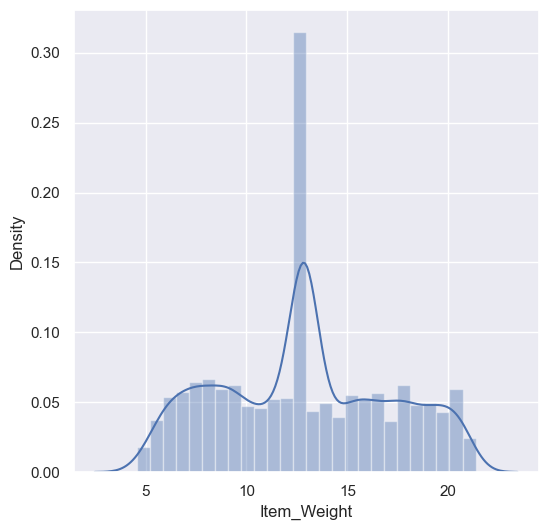

In [18]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12252\193435663.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


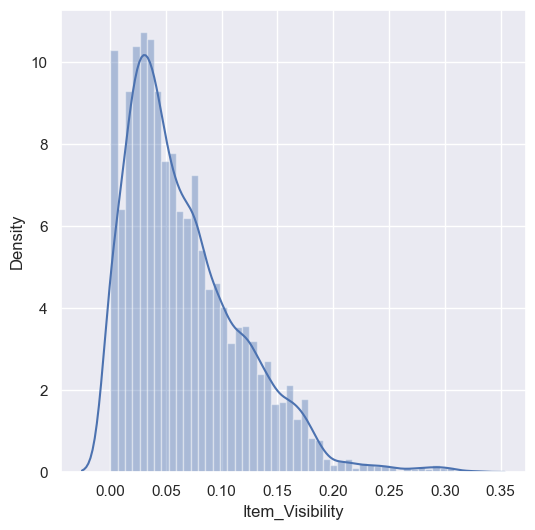

In [19]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12252\1610987680.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


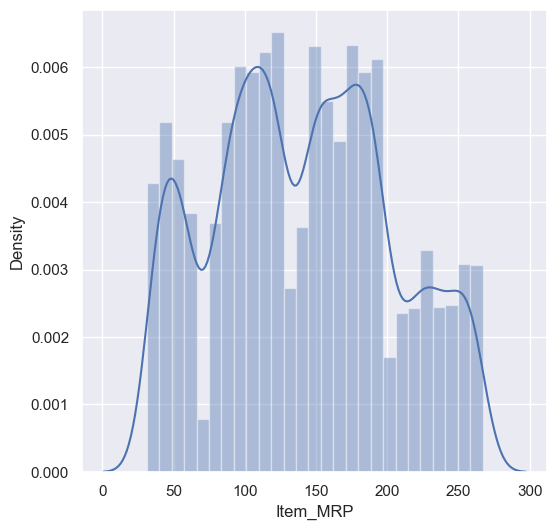

In [20]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12252\1323853436.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


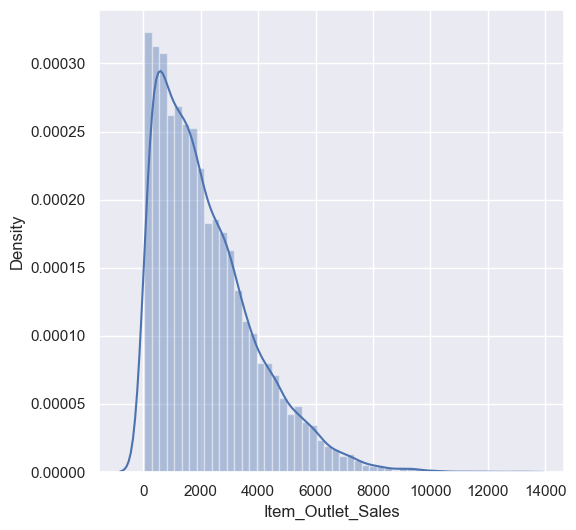

In [21]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

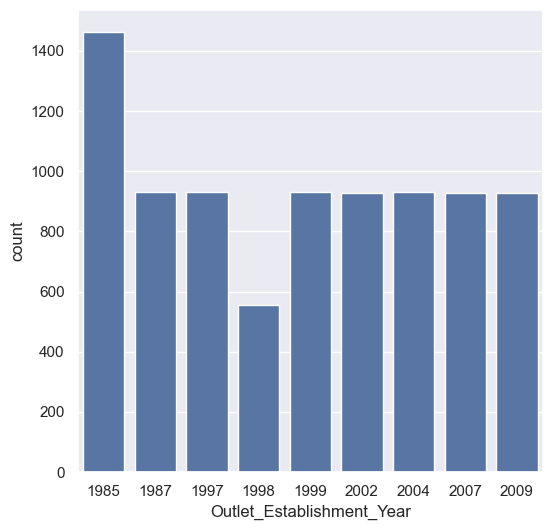

In [22]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

Categorical Features

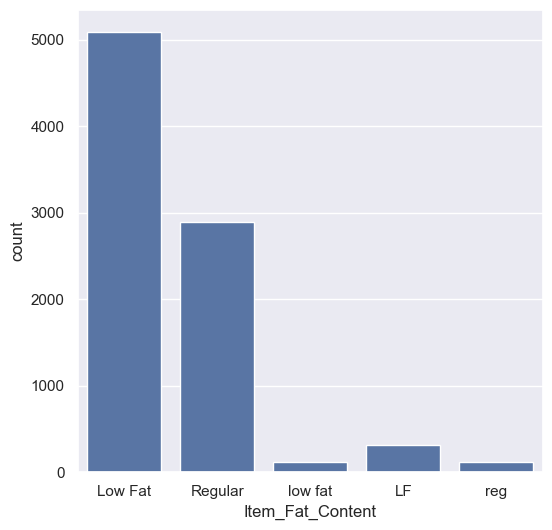

In [23]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

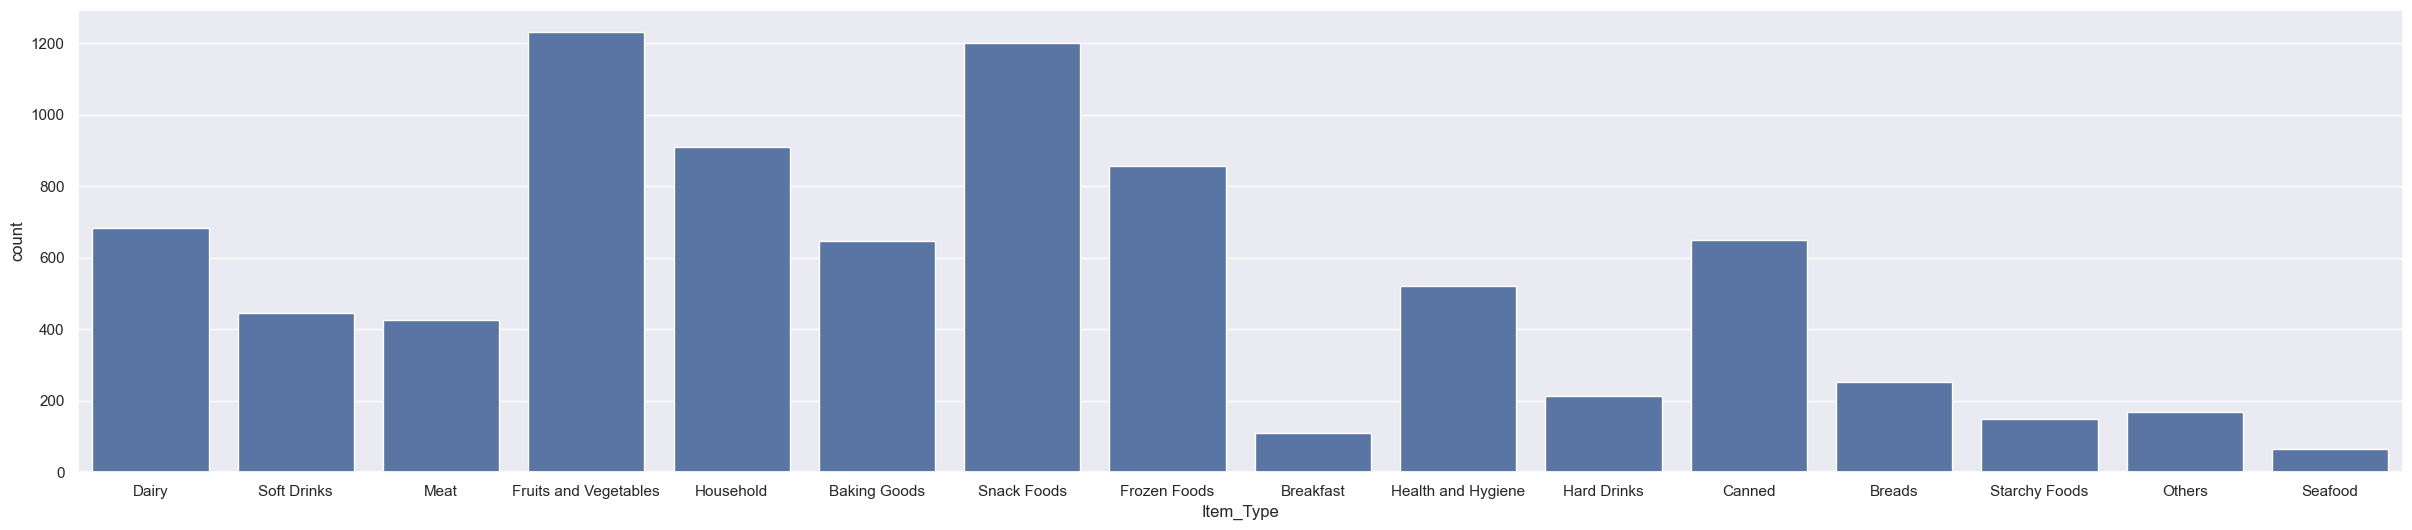

In [24]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

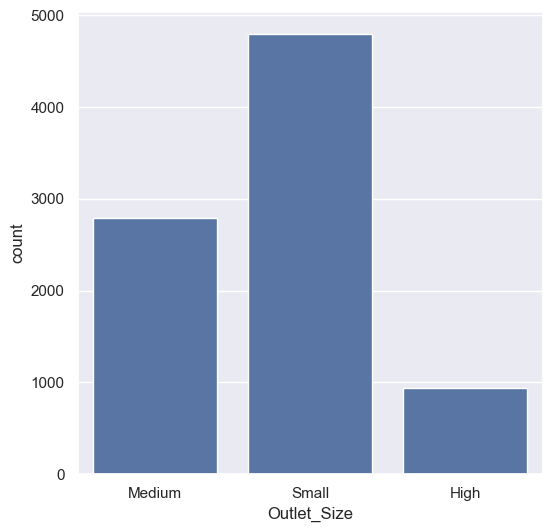

In [25]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

Data Pre-Processing

In [26]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [28]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [29]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label Encoding

In [30]:
encoder = LabelEncoder()

In [31]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [32]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and Target

In [33]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [34]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [35]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training

XGBoost Regressor

In [40]:
regressor = XGBRegressor()

In [41]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [42]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [43]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [44]:
print('R Squared value = ', r2_train)

R Squared value =  0.8762174618111388


In [45]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [46]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [47]:
print('R Squared value = ', r2_test)

R Squared value =  0.5017253991620692
